In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

The data in csv file does not have column names so adding them before dispalying the data.

In [2]:
df=pd.read_csv('glass.csv',header=None)
df.columns=["No","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
df.drop('No',axis=1,inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,1
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10,2
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2


In [6]:
df.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Class      int64
dtype: object

In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The mean of some features are very small such as "Fe", "Ba" or very large, "Si". Also, "Si" feature has larger weight in the oxide.

<Axes: >

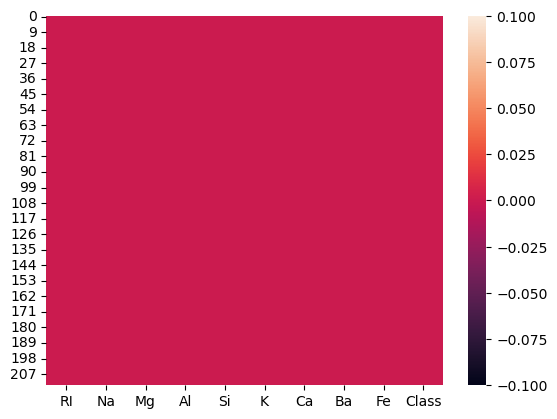

In [10]:
#To check null values

sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

There are no null values in the dataset.

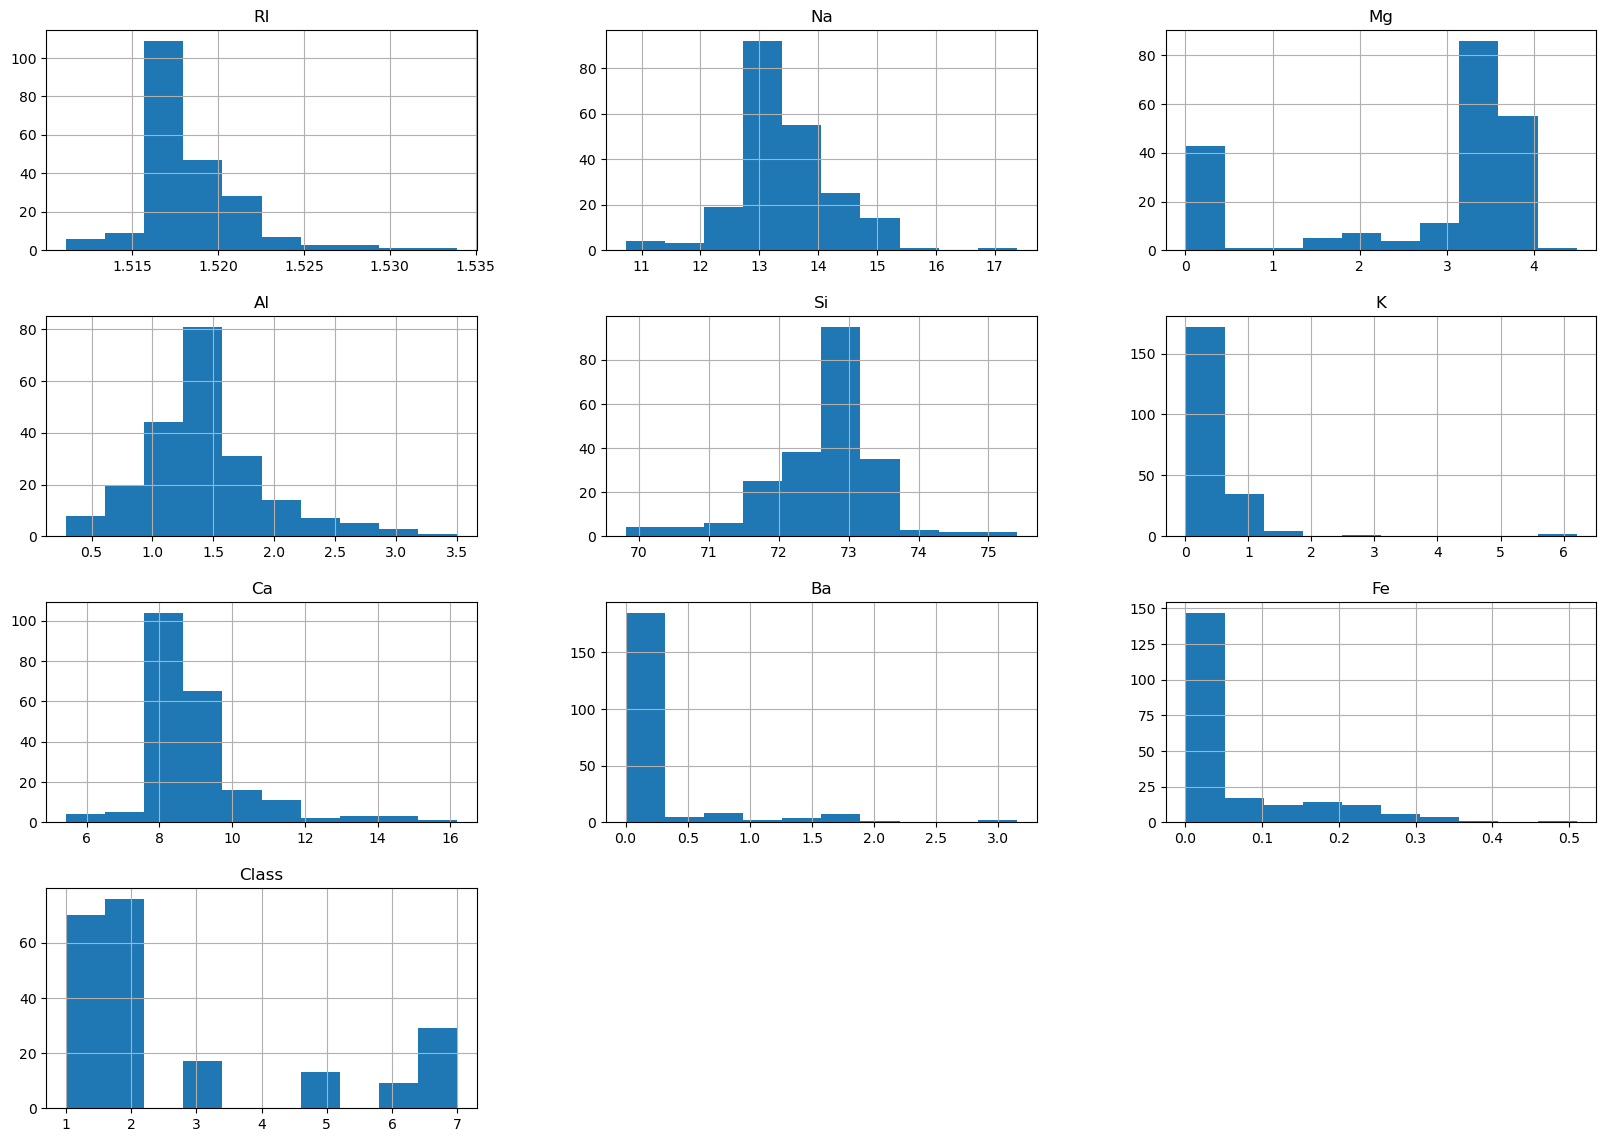

In [12]:
df.hist(figsize=(20,14))
plt.show()

<Axes: >

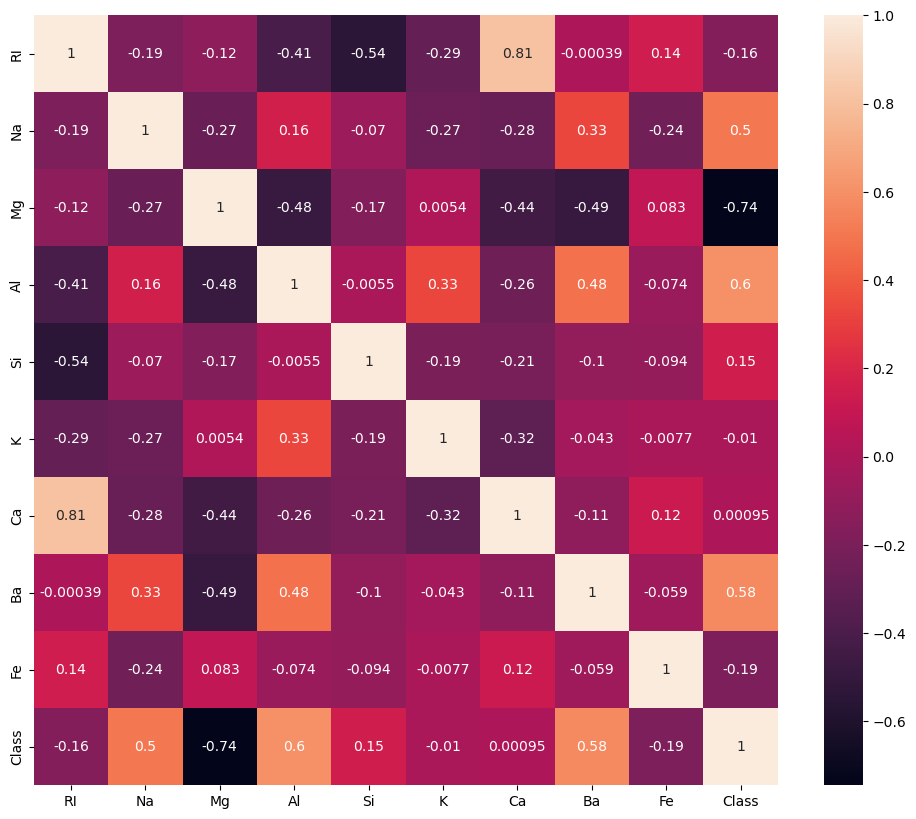

In [13]:
#To chcek correlation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

There is a strong positive linear relationship between "Ca" and "RI" with 0.81 correlation coefficient.

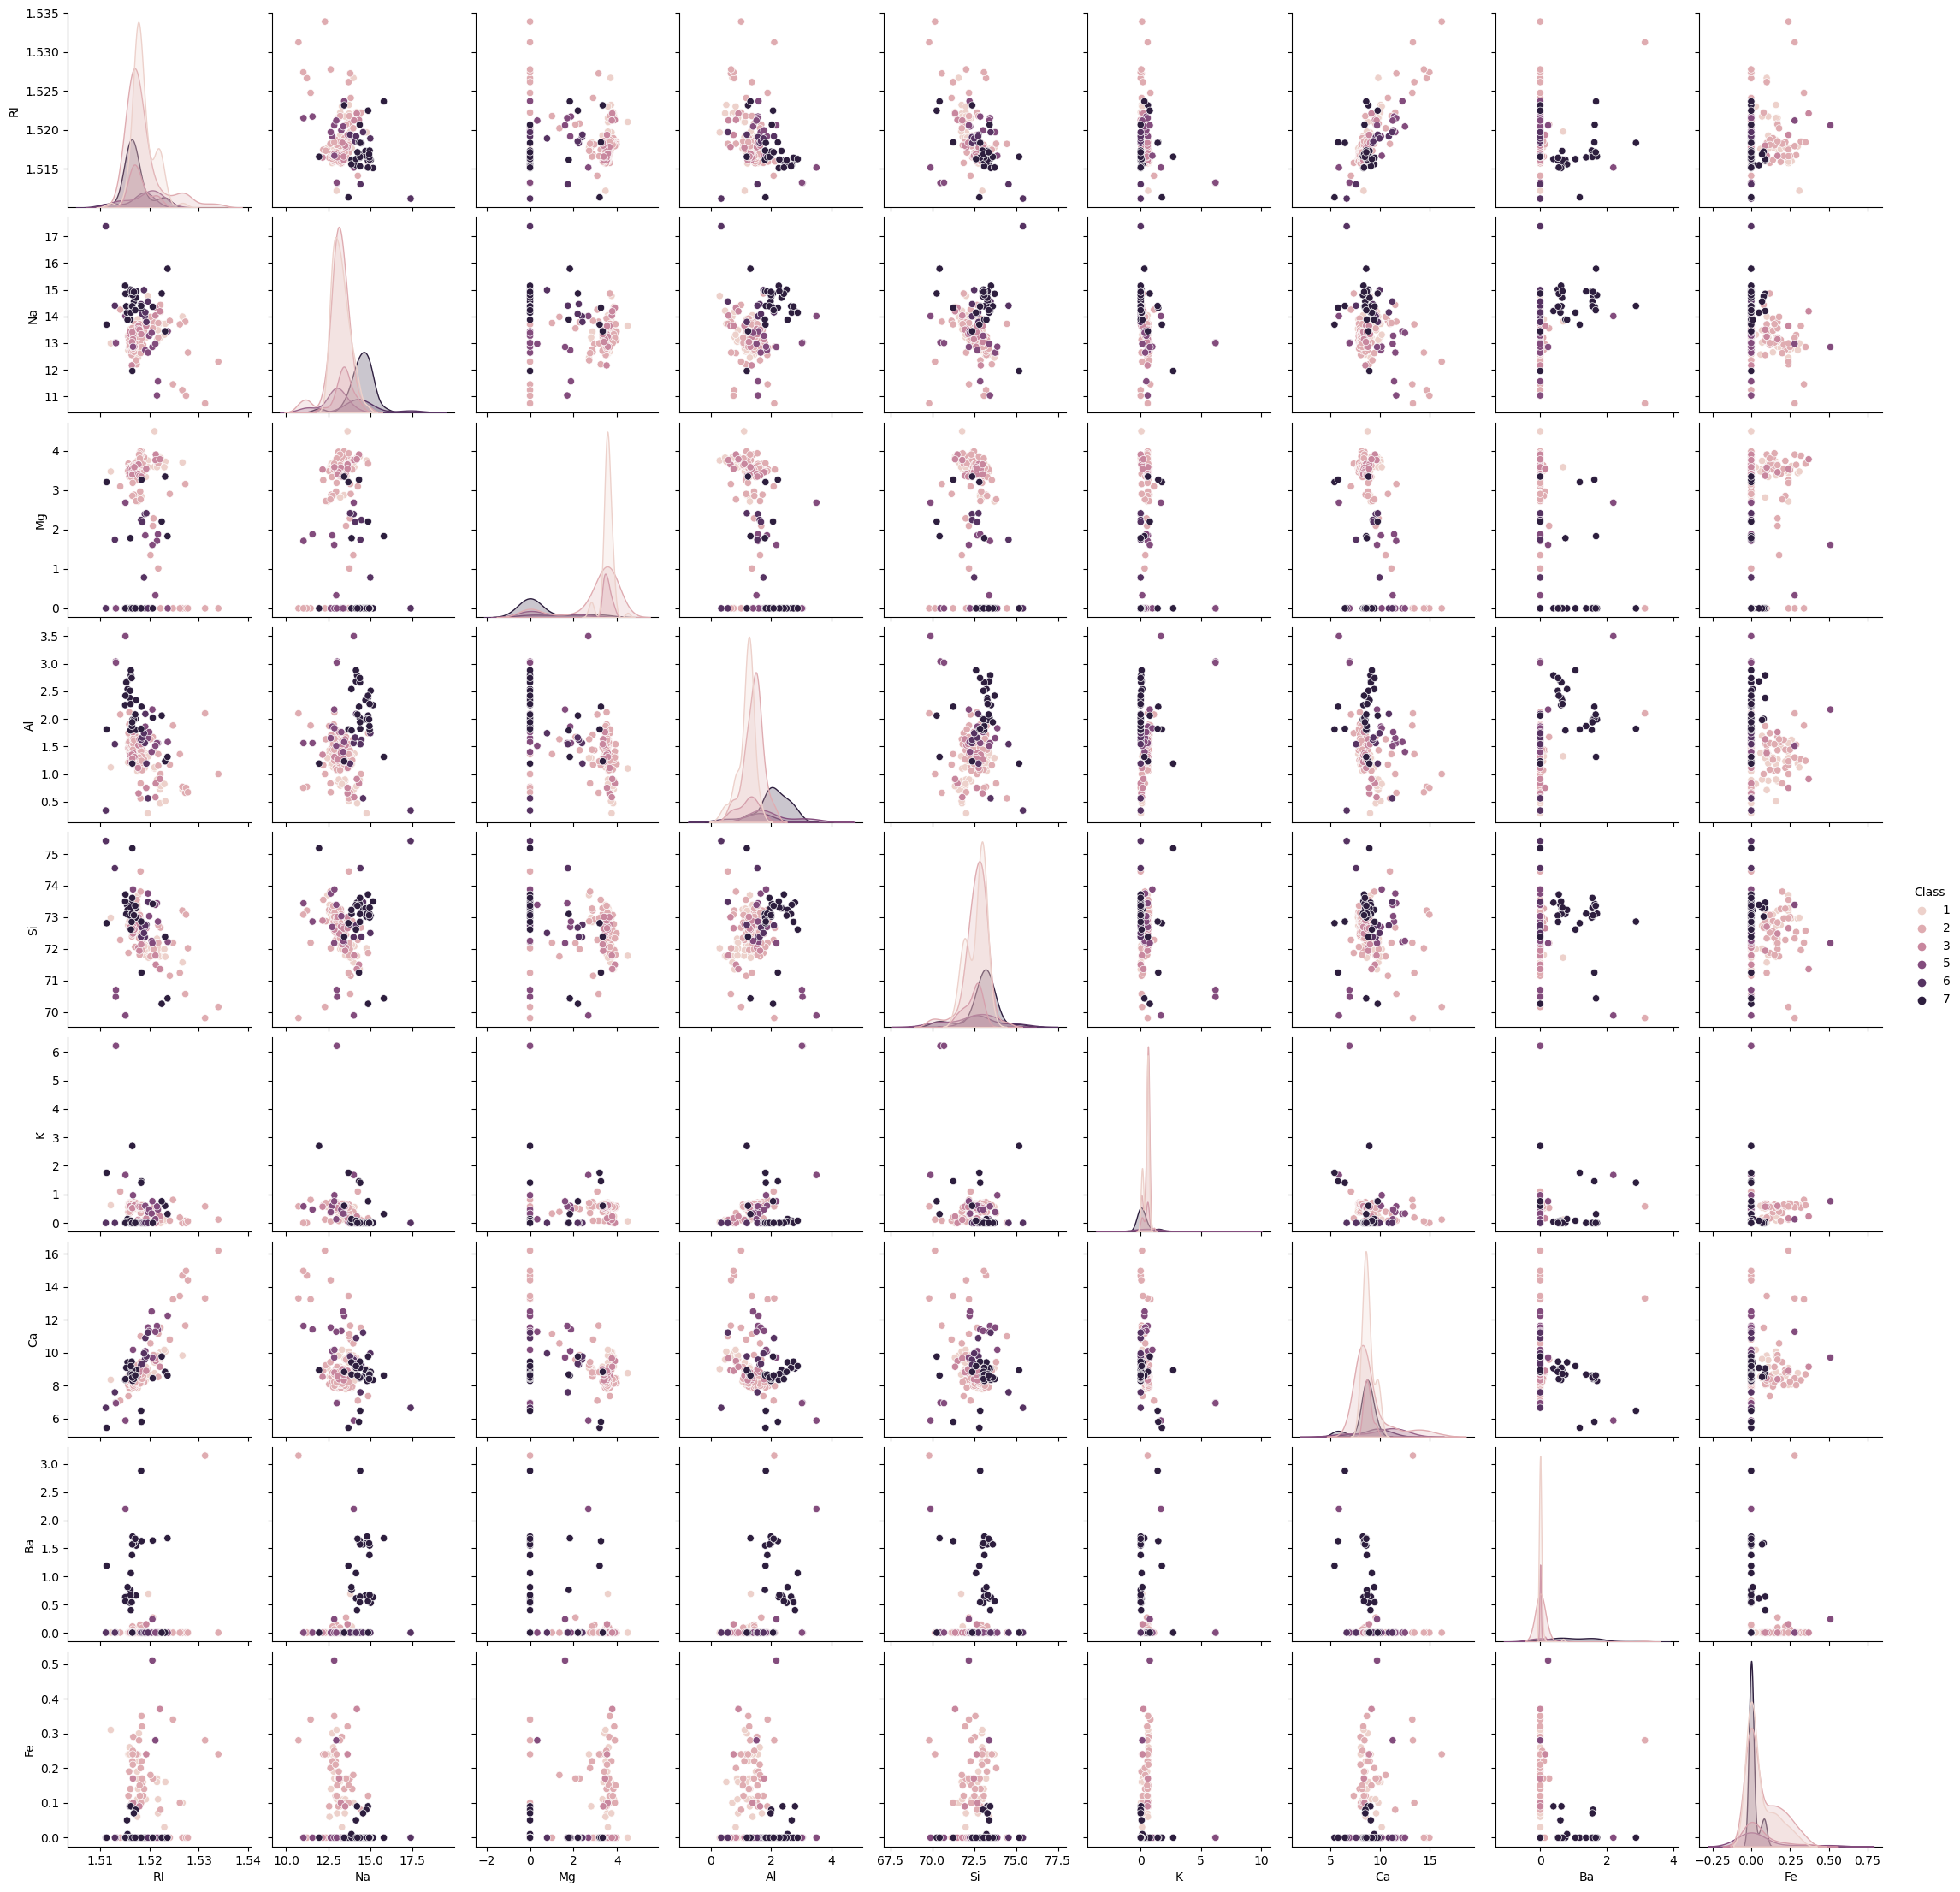

In [14]:
#distribution of features

sns.pairplot(df,hue='Class')

<Axes: >

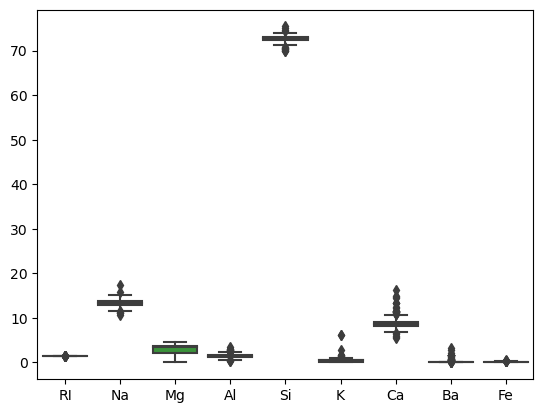

In [15]:
sns.boxplot(data=df.loc[:,'RI':'Fe'])

None of the features are normally distrubuted. Some features have high degree of skewness such as "K", "Ca", "Ba" and "Fe". There are many outliers in dataset.

<Axes: xlabel='Class', ylabel='Fe'>

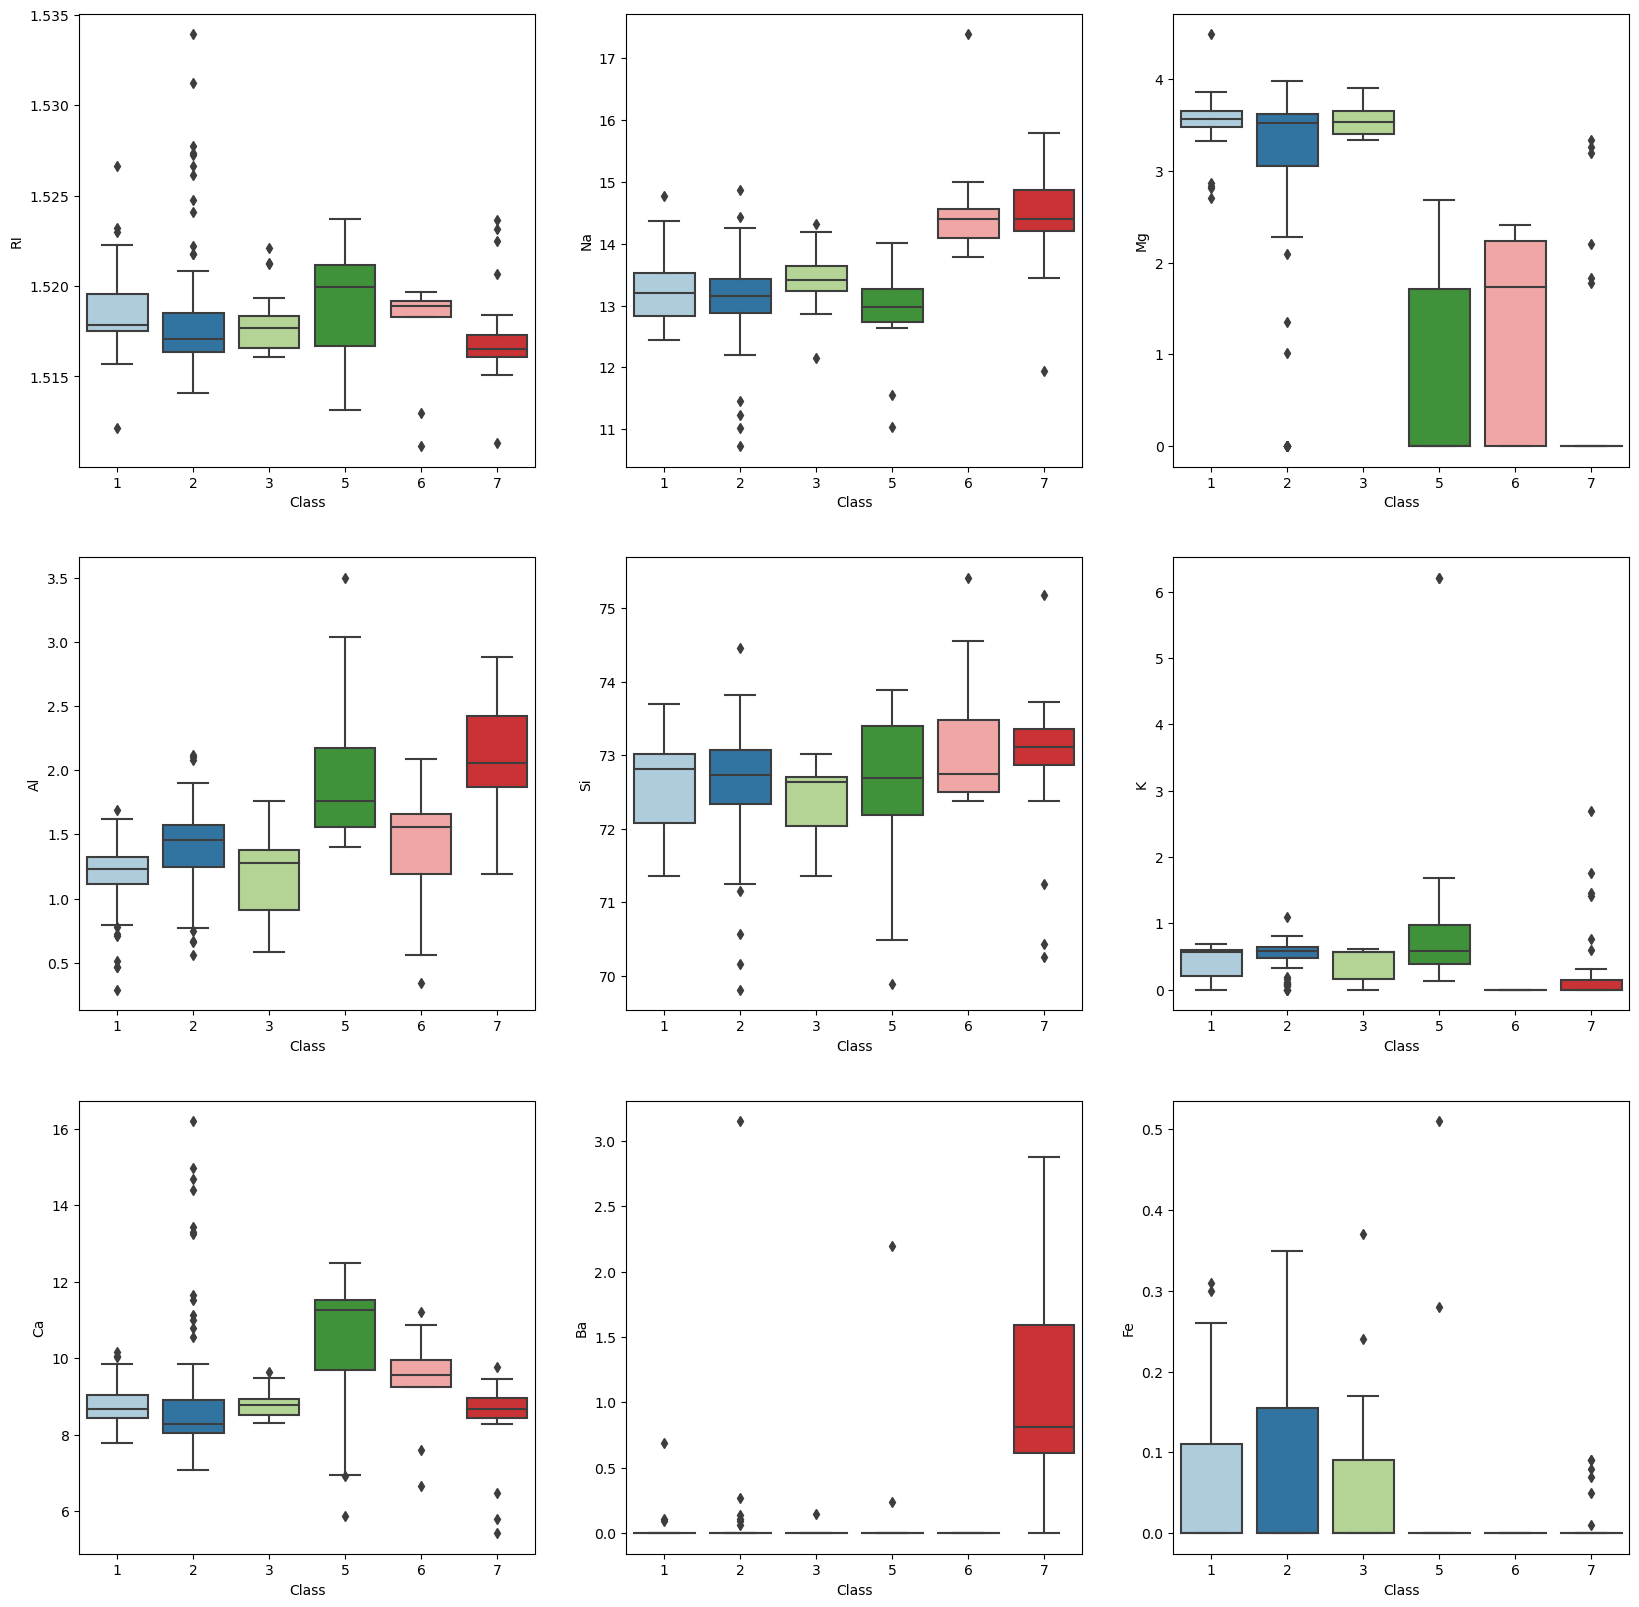

In [16]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(20,20))
sns.boxplot(x='Class',y='RI',data=df,palette='Paired',ax=axs[0][0])
sns.boxplot(x='Class',y='Na',data=df,palette='Paired',ax=axs[0][1])
sns.boxplot(x='Class',y='Mg',data=df,palette='Paired',ax=axs[0][2])
sns.boxplot(x='Class',y='Al',data=df,palette='Paired',ax=axs[1][0])
sns.boxplot(x='Class',y='Si',data=df,palette='Paired',ax=axs[1][1])
sns.boxplot(x='Class',y='K',data=df, palette='Paired',ax=axs[1][2])
sns.boxplot(x='Class',y='Ca',data=df,palette='Paired',ax=axs[2][0])
sns.boxplot(x='Class',y='Ba',data=df,palette='Paired',ax=axs[2][1])
sns.boxplot(x='Class',y='Fe',data=df,palette='Paired',ax=axs[2][2])

Distribution of glass types.

In [17]:
df['Class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

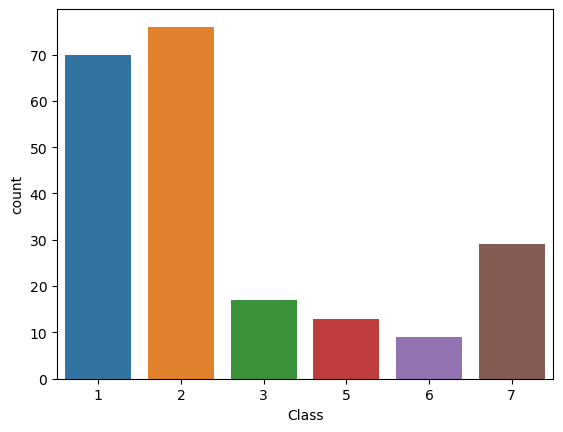

In [18]:
sns.countplot(x='Class',data=df)

The data set is highly imbalanced. The two glass types (building windows) contributes 68% of observations.

In [19]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Implementing Machine Learning thru various models

In [55]:
x=df.iloc[:,0:9]
y=df.iloc[:,9]

Seperated target and its features so that x only has input variables and y only has output variable

In [56]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Class, Length: 214, dtype: int64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


# Using Linear Regression

In [38]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [39]:
LR.score(x_test,y_test)

0.7664801283813294

Acurracy using Linear Regression model is 76.64

# Using Decision Tree Classifier

In [43]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
DTC.score(x_test,y_test)

0.676923076923077

Accuracy using Decision Tree Classifier is 67.69

# Using Random Forest Classifier

In [48]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
RFC.score(x_test,y_test)

0.7846153846153846

Accuracy using Random Forest Classifier is 78.46

# Using Gradient Boosting Classifier

In [53]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
GBC.score(x_test,y_test)

0.8

Accuracy using Gradient Boosting Classifier is 80

# Using Extra Trees Classifier

In [58]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [59]:
ETC.score(x_test,y_test)

0.7846153846153846

Accuracy using Extra Tree Classifier is 78.46